In [1]:
## Kaggle ya da herhangi bir noktadan denetimli regression için uygun bir veri seti bulup 
#şu ana kadar öğrendiğimiz 3 algoritmayla bir makine öğrenmesi modeli geliştirmek.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [3]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df= pd.get_dummies(df, drop_first=True)

In [7]:
x = df.drop(columns=["charges"])
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
2767,47,45.320,1,False,False,False,True,False
2768,21,34.600,0,False,False,False,False,True
2769,19,26.030,1,True,True,True,False,False
2770,23,18.715,0,True,False,True,False,False


In [8]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test)
y_pred

array([ 1.02043701e+04,  3.67194016e+04,  9.12845121e+03,  5.78246664e+03,
        6.54575972e+03,  3.40185103e+04,  5.66828282e+03,  3.90086431e+04,
        1.16454050e+04,  3.20527460e+03,  1.28824039e+04,  1.29358416e+04,
        5.21819281e+03,  1.12950879e+04,  4.23782298e+03,  8.13025954e+03,
        9.98406914e+03,  9.40857721e+03,  4.80446309e+03,  3.70631055e+03,
        1.28278733e+04,  3.29284192e+04,  3.05564912e+04,  3.95280631e+04,
        2.71257147e+04,  9.53997149e+03, -1.54547427e+03,  1.65900839e+04,
        8.15350018e+03, -4.47784567e+02,  1.43626155e+04,  3.77260905e+03,
        2.65398053e+03,  2.24560091e+03,  1.49217398e+04,  1.19076824e+04,
        1.74547614e+03,  2.24733900e+03,  8.18148098e+03,  3.19150544e+04,
        6.08516291e+03,  9.71038107e+03,  1.44363210e+04,  6.79762461e+03,
        1.02145691e+02,  4.03381468e+04,  4.09838808e+03,  3.52712187e+04,
        5.17146382e+03,  7.17321147e+03,  3.60091583e+04,  9.58408194e+03,
        3.45863716e+03,  

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mae

4224.767553044483

In [15]:
mse = mean_squared_error(y_test, y_pred)
mse

40004195.942378715

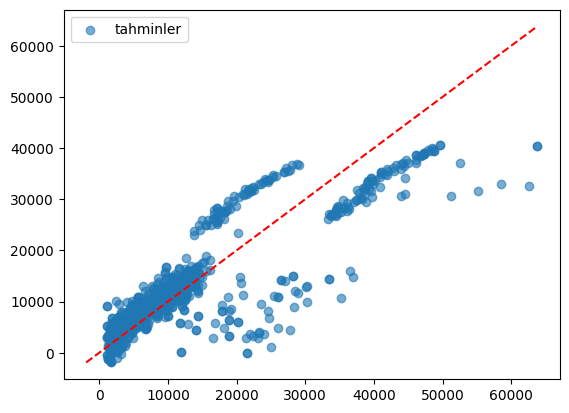

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, label="tahminler", alpha = 0.6)
#plt.xlabel("gercek fiyatlar")
#plt.ylabel("tahmin fiyatlar")
plt.legend()
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color = "red", linestyle = "--")
plt.show()